In [8]:
import torch
from torchvision import transforms, datasets

In [ ]:
x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

x = torch.zeros([2, 5])
y = torch.rand([2, 5])

# Changing the shape of the Tensor
y = y.view([1, 10])

In [ ]:
# Pass in transformers to the data here
train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
# Using batches of data is more efficient, especially when the dataset
# is huge. Also, passing in batches lets the machine learn more generalizations
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0]
print(y)

tensor(1)


In [ ]:
import matplotlib.pyplot as plt

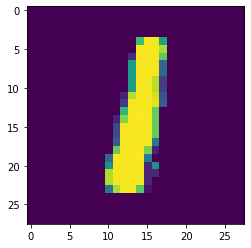

In [ ]:
# PyTorch has a different shaping standard. There's a 1x28x28 shaping
# style for an image.

plt.imshow(x.view([28, 28]))
plt.show()

In [ ]:
# Optimizer tries to decrease loss and it doesn't have any idea
# how much better we could get. You want to balance the dataset.

In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for data in trainset:
  xs, ys = data
  
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    # 3 layers of 64 neurons for our hidden layer
    self.fc1 = nn.Linear(784, 64) # Activation function runs on the output side
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    # Feed forward neural net
    # The activation function is whether or not the neuron is firing
    # Don't wanna run relu on the output layer. Log softmax is a good choice.

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    # Which dimension to apply softmax on? Output is flat, so dim=1
    # It is similar to axes.
    return F.log_softmax(x, dim=1)

net = Net()

In [ ]:
X = torch.rand((28, 28))
# Why is the -1 here? Says that the input is of unknown shape
X = X.view(-1, 28*28)
output = net(X)
print(output)

tensor([[-2.4144, -2.1674, -2.2512, -2.3242, -2.3937, -2.4029, -2.2217, -2.2962,
         -2.3061, -2.2778]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
# Loss and Optimizer. We want to minimize loss obviously. 
# Note - You can tell your neural network which weights to adjust
import torch.optim as optim

# You don't want your learning rate to be too large as it won't
# catch the nuances of the data. Also, it shouldn't be too small
# as the solution will only be a local maxima/minima. 

# On complex problems, we use a decaying learning rate.
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 3 # 3 full passes through data

# Zero gradient is if you wanna batch the data up
# 2 main ways of calculating loss: one hot vector ([0, 1, 0, ...]) 
# and nll (for scalar data)
for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)


tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      
      total += 1

print("Accuracy: {}".format(round(correct/total, 3)))

Accuracy: 0.981


In [ ]:
import matplotlib.pyplot as plt


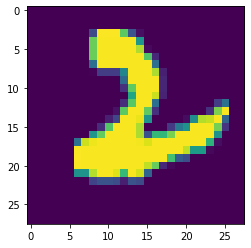

tensor(2)


In [ ]:
plt.imshow(X[1].view(28, 28))
plt.show()
print(torch.argmax(net(X[1].view(-1, 28*28))[0]))

# CNN (Convo Neural Net)

In [ ]:
# Traditionally, CNNs were used for image stuff. However, in recent
# year, they have even beat RNNs (Reccurent) in sequential problems.
# Images are arrays of pixels. Each convolution (or kernel) takes a
# subset of these pixels and look for features within them.

# Condense the image and then pool them (maxpooling). 

In [1]:
from google.colab import drive 

drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/catdog/catdog.zip' -d '/content/drive/MyDrive/catdog_unzipped'

Archive:  /content/drive/MyDrive/catdog/catdog.zip


KeyboardInterrupt: ignored

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm 

In [3]:
REBUILD_DATA = False

class DogsVSCats:
  # Images have varying size and shape, but we want them
  # to be uniform.
  IMG_SIZE = 50
  CATS = "/content/drive/MyDrive/catdog_unzipped/PetImages/Cat"
  DOGS = "/content/drive/MyDrive/catdog_unzipped/PetImages/Dog"
  LABELS = {CATS: 0, DOGS: 1}

  training_data = []
  # MAKE SURE THE DATASET IS BALANCED. If there are 10000 pictures of cats and 100 of dogs, you're not
  # gonna make a decent neural network ovviamente.
  catcount = 0
  dogcount = 0
 
    # Everything is a feature to the machine, even the colors of
    # an image. So think about whether color makes a difference
    # to your neural net.
  def make_training_data(self):
    for label in self.LABELS:
      for f in tqdm(os.listdir(label)):
        try:
            path = os.path.join(label, f)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))

            # One hot vectors allow a better loss metric. Once again,
            # an example of a one hot vector would be [1, 0] if it's
            # a cat and [0, 1] if it's a dog. The np.eye function
            # helps doing that with the diagonals.
            self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

            if label == self.CATS:
                self.catcount += 1

            elif label == self.DOGS:
                self.dogcount += 1
        except Exception as e:
            pass
        
    np.random.shuffle(self.training_data)
    try:
      np.save("/content/drive/MyDrive/training_data.npy", self.training_data)
    except Exception as e:
      print(str(e))
    print("Cats: {}".format(self.catcount))
    print("Dogs: {}".format(self.dogcount))
    

if REBUILD_DATA:
    dogvcats = DogsVSCats()
    dogvcats.make_training_data()

In [ ]:
# from google.colab.drive import flush_and_unmount

# flush_and_unmount()

# Seems like colab sometimes doesn't show large (binary?) files after saving it
# so, after changing to a GPU runtype, my notebook couldn't detect the training
# data, even though it was saved to my Google Drive. Flush and unmount, fixed
# the issue.

In [4]:
training_data = np.load("/content/drive/MyDrive/training_data.npy", allow_pickle=True)

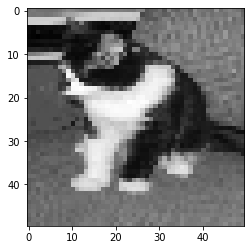

In [ ]:
plt.imshow(training_data[1][0], cmap="gray")
plt.show()

In [10]:
# Mostimes you just want the training steps to be done on the GPU and the
# production model can totally run on CPU. Making this distinction can be
# done as well.

if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

# You can assign multiple networks to multiple GPU's and multiple layers
# even to other GPU's in PyTorch.

torch.cuda.device_count()

1

In [11]:
# Building a neural network to classify images

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 x 5 kernel
        # Images are 2D so that's all we need. If you want
        # more dimensions, you can code them yourself as well!
        
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)      
        
        # Now we have to flatten this 2D conv layer to 1D or 
        # "flatten" in TensorFlow terminology
        x = torch.randn(50, 50).view(-1, 1, 50, 50)
        self._to_linear = None
        self.convs(x)
        
        # The important part is figuring out what the input number
        # to the first linear layer is going to be.
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
        
    # We're gonna run the forward method through the three conv
    # layers in an attemp to see the result - to see what to
    # pass as input to the input fc1 layer
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        if not self._to_linear:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        
        return x
    
    def forward(self, x):
        # Gotta run convs or Flatten twice to know the number of
        # input neurons
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return F.softmax(x, dim=1)
        
        
net = Net().to(device)

In [15]:
import torch.optim as optim

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X / 255.0    # Scaling/Normalizing the image pixel data
# No need to reshape the y (label) values
y = torch.Tensor([i[1] for i in training_data])

# Seperating training/validation data
VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)

train_x = X[:-val_size]
train_y = y[:-val_size]

test_x = X[-val_size:]
test_y = y[-val_size:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
BATCH_SIZE = 100
EPOCHS = 4

def train(net):
  optimizer = optim.Adam(net.parameters(), lr=0.001)
  loss_function = nn.MSELoss()
  for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
          batch_x = train_x[i:i + BATCH_SIZE].view(-1, 1, 50, 50)
          batch_y = train_y[i:i + BATCH_SIZE]

          batch_x, batch_y = batch_x.to(device), batch_y.to(device)
          
          # gotta zero the gradients
          # no difference between optimizer.zero_grad and net.zero_grad
          # if you've passed all the network's parameters inside the optimizer.
          
          net.zero_grad()
          outputs = net(batch_x)
          loss = loss_function(outputs, batch_y)
          loss.backward()
          optimizer.step()

      print("Epoch: {}. Loss: {}".format(epoch, loss)) 

train(net)

100%|██████████| 225/225 [00:04<00:00, 49.68it/s]


Epoch: 0. Loss: 0.14298878610134125


100%|██████████| 225/225 [00:04<00:00, 51.12it/s]


Epoch: 1. Loss: 0.12559187412261963


100%|██████████| 225/225 [00:04<00:00, 51.09it/s]


Epoch: 2. Loss: 0.09057550877332687


100%|██████████| 225/225 [00:04<00:00, 51.18it/s]

Epoch: 3. Loss: 0.060223646461963654


In [ ]:
def test(net):
  correct = 0
  total = 0

  with torch.no_grad():
      for i in tqdm(range(len(test_x))):
          real_class = torch.argmax(test_y[i]).to(device)
          # test_x needs to be in the device too!
          net_out = net(test_x[i].view(-1, 1, 50, 50).to(device))[0]
          predicted_class = torch.argmax(net_out)
          
          if predicted_class == real_class:
              correct += 1
          
          total += 1

  print("Accuracy: {}".format(round(correct/total, 3)))

test(net)

100%|██████████| 2494/2494 [00:05<00:00, 438.82it/s]

Accuracy: 0.755


In [ ]:
torch.cuda.is_available() # checks if a cuda is available

In [ ]:
net.to(device)

In [23]:
# In this model, loss was abysmally low but accuracy was still stuck at
# a 71.5%. What accounts for this? How does in-sample accuracy compare
# to out-sample accuracy? Cause the model basically memorizes everything.
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):
  if train:
    net.zero_grad()
  
  outputs = net(X)
  # In-sample accuracy is usually greater than out-sample accuracy
  matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
  acc = matches.count(True) / len(matches)
  loss = loss_function(outputs, y)

  if train:
    loss.backward()
    optimizer.step()

  return acc, loss

In [27]:
def test(size=32):
  random_start = np.random.randint(len(test_x) - size)
  X, y = test_x[random_start:random_start + size], test_y[random_start:random_start + size]
  
  with torch.no_grad():
    val_acc, val_loss = fwd_pass(X.view(-1, 1, 50, 50).to(device), y.to(device))
  return val_acc, val_loss

val_acc, val_loss = test()
print(val_acc, val_loss)

0.625 tensor(0.2296, device='cuda:0')


In [ ]:
# While training, we also wanna test! How is in-sample loss as compared to 
# out-sample loss? Visualize it.

import time

MODEL_NAME = f"model-{int(time.time())}"
net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()
print(MODEL_NAME)

def train():
  BATCH_SIZE = 100
  EPOCHS = 5

  with open("model.log", "a") as f:
    for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
        batch_x = train_x[i:i + BATCH_SIZE].view(-1, 1, 50, 50).to(device)
        batch_y = train_y[i:i + BATCH_SIZE].to(device)

        acc, loss = fwd_pass(batch_x, batch_y, train=True)
        # Don't test at every step or at every EPOCH. Find a suitable number.

        if i % 50 == 0:
          val_acc, val_loss = test(size=100)
          f.write(f"{MODEL_NAME}, {round(time.time(), 3)}, {round(float(acc), 2)}, {round(float(loss), 4)}, {round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n")

train()

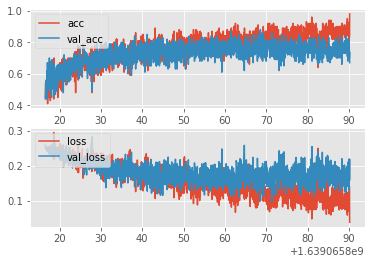

In [35]:
# Graph the log
import matplotlib.pyplot as plt
from matplotlib import style 

style.use("ggplot")

model_name = "model-1639065816"

def create_acc_loss_graph(model_name):
  contents = open("/content/model.log", "r").read().split('\n')
  times, accuracies, losses, val_accs, val_losses = [], [], [], [], []

  for c in contents:
    if model_name in c:
      # It's also informative to have the EPOCH number
      name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
      times.append(float(timestamp))
      accuracies.append(float(acc))
      losses.append(float(loss))
      val_accs.append(float(val_acc))
      val_losses.append(float(val_loss))

  fig = plt.figure()
  
  ax1 = plt.subplot2grid((2, 1), (0, 0))
  ax2 = plt.subplot2grid((2, 1), (1, 0), sharex=ax1)

  ax1.plot(times, accuracies, label="acc")
  ax1.plot(times, val_accs, label="val_acc")
  ax1.legend(loc=2)

  ax2.plot(times, losses, label="loss")
  ax2.plot(times, val_losses, label="val_loss")
  ax2.legend(loc=2)

  plt.show()



create_acc_loss_graph(model_name)